# Group 142 Problem statement 6
<hr><br>
This dataset is one that has been artificially created to seem like weather data for the sake of 
classification procedures. It takes into account a wide range of aspects that are associated with 
the weather such as temperature, humidity, precipitation, cloud cover, season etc. and divides 
the weather into the 4 distinct categories. We need to perfrom, data visualization, data pre-processing 
and model training on it.

## <u> Team members </u>

| Name                    | Bits Id        |
|:------------------------|:---------------|
| HRISHIKESH MALAKAR      | 2023Ac05058    |
| NAIR ANIT KAVALIBALAN   | 2023ac05503    |
| ANUP JINDAL             | 2023ac05472    |





## 1. Importing libraries and necessary dataset.
<hr>

In [1]:
#pip install seaborn matplotlib scikit-learn

In [127]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns 


In [128]:
weather_data = pd.read_csv('./weather_classification_data.csv')

## 2. Data visualization and exploration
<hr>

In [129]:
### Printing random two rows

## Select two random rows
random_rows = weather_data.sample(n=2)

## Print in good format
print(random_rows.to_string(index=False))


 Temperature  Humidity  Wind Speed  Precipitation (%)   Cloud Cover  Atmospheric Pressure  UV Index Season  Visibility (km) Location Weather Type
          28        77        15.0                 94 partly cloudy               1014.93         7 Summer              6.5   inland       Cloudy
          36        25         0.5                  7         clear               1014.08        11 Autumn              8.5  coastal        Sunny


In [130]:
#Check dimension of dataset
weather_data.shape
##weather_data.info

(13200, 11)

#### Dataset has 13200 records with 10 features and one target class. This is a multiclass classification problem.

In [131]:
# Meta info about the weather dataset
weather_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Temperature           13200 non-null  int64  
 1   Humidity              13200 non-null  int64  
 2   Wind Speed            13200 non-null  float64
 3   Precipitation (%)     13200 non-null  int64  
 4   Cloud Cover           13200 non-null  object 
 5   Atmospheric Pressure  13200 non-null  float64
 6   UV Index              13200 non-null  int64  
 7   Season                13200 non-null  object 
 8   Visibility (km)       13200 non-null  float64
 9   Location              13200 non-null  object 
 10  Weather Type          13200 non-null  object 
dtypes: float64(3), int64(4), object(4)
memory usage: 1.1+ MB


In [132]:
# Rename variables and convert objects into categorical data
weather_data.rename(columns={"Wind Speed":"Wind_Speed", "Precipitation (%)": "Precipitation",
                            "Cloud Cover":"Cloud_Cover","Atmospheric Pressure":"Atmospheric_Pressure", 
                             "UV Index":"UV_Index", "Visibility (km)":"Visibility", "Weather Type":"Weather_Type"},
                                errors="raise",inplace=True)
 

In [133]:
#Convert to catagorical variables
for col in ['Cloud_Cover', 'Season', 'Location', 'Weather_Type']:
    weather_data[col] = weather_data[col].astype('category')

In [134]:
weather_data.head(2)

,Temperature,Humidity,Wind_Speed,Precipitation,Cloud_Cover,Atmospheric_Pressure,UV_Index,Season,Visibility,Location,Weather_Type
0,14,73,9.5,82,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39,96,8.5,71,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy


In [135]:
# Find number of unique classes in the target dataset
weather_data.Weather_Type.unique()

['Rainy', 'Cloudy', 'Sunny', 'Snowy']
Categories (4, object): ['Cloudy', 'Rainy', 'Snowy', 'Sunny']

In [136]:
# Find number of unique values in the features like Cloud Cover, Season, and Location
print("Cloud Cover:", weather_data.Cloud_Cover.unique())
print("Season:", weather_data.Season.unique())
print("Location:",weather_data.Location.unique())

Cloud Cover: ['partly cloudy', 'clear', 'overcast', 'cloudy']
Categories (4, object): ['clear', 'cloudy', 'overcast', 'partly cloudy']
Season: ['Winter', 'Spring', 'Summer', 'Autumn']
Categories (4, object): ['Autumn', 'Spring', 'Summer', 'Winter']
Location: ['inland', 'mountain', 'coastal']
Categories (3, object): ['coastal', 'inland', 'mountain']


In [137]:
#Create a copy of origional df
weather_data_org = weather_data.copy(deep=True)

In [138]:
#Check for missing values
weather_data.isnull().apply(pd.value_counts)

C:\Users\I060587\AppData\Local\Temp\ipykernel_57164\457418055.py:2: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  weather_data.isnull().apply(pd.value_counts)


,Temperature,Humidity,Wind_Speed,Precipitation,Cloud_Cover,Atmospheric_Pressure,UV_Index,Season,Visibility,Location,Weather_Type
False,13200,13200,13200,13200,13200,13200,13200,13200,13200,13200,13200


In [139]:
#Check for NA values
weather_data.isna().apply(pd.value_counts)

C:\Users\I060587\AppData\Local\Temp\ipykernel_57164\4052613377.py:2: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  weather_data.isna().apply(pd.value_counts)


,Temperature,Humidity,Wind_Speed,Precipitation,Cloud_Cover,Atmospheric_Pressure,UV_Index,Season,Visibility,Location,Weather_Type
False,13200,13200,13200,13200,13200,13200,13200,13200,13200,13200,13200


#### There are no null data or NaN kind of data.

In [140]:
#Print 5 point summary by describing the dataset
weather_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Temperature,13200.0,19.127576,17.386327,-25.00,4.0,21.00,31.0000,109.00
Humidity,13200.0,68.710833,20.194248,20.00,57.0,70.00,84.0000,109.00
Wind_Speed,13200.0,9.832197,6.908704,0.00,5.0,9.00,13.5000,48.50
Precipitation,13200.0,53.644394,31.946541,0.00,19.0,58.00,82.0000,109.00
Atmospheric_Pressure,13200.0,1005.827896,37.199589,800.12,994.8,1007.65,1016.7725,1199.21
UV_Index,13200.0,4.005758,3.856600,0.00,1.0,3.00,7.0000,14.00
Visibility,13200.0,5.462917,3.371499,0.00,3.0,5.00,7.5000,20.00


In [141]:
# Checking the frequency distribution of Target class
weather_data['Weather_Type'].value_counts(normalize=True)

Weather_Type
Cloudy    0.25
Rainy     0.25
Snowy     0.25
Sunny     0.25
Name: proportion, dtype: float64

#### There is no class imbalance in the target variable.

#### Data Visiuliztaion using the raw data as is

#### Distribution of continuous variables against target class

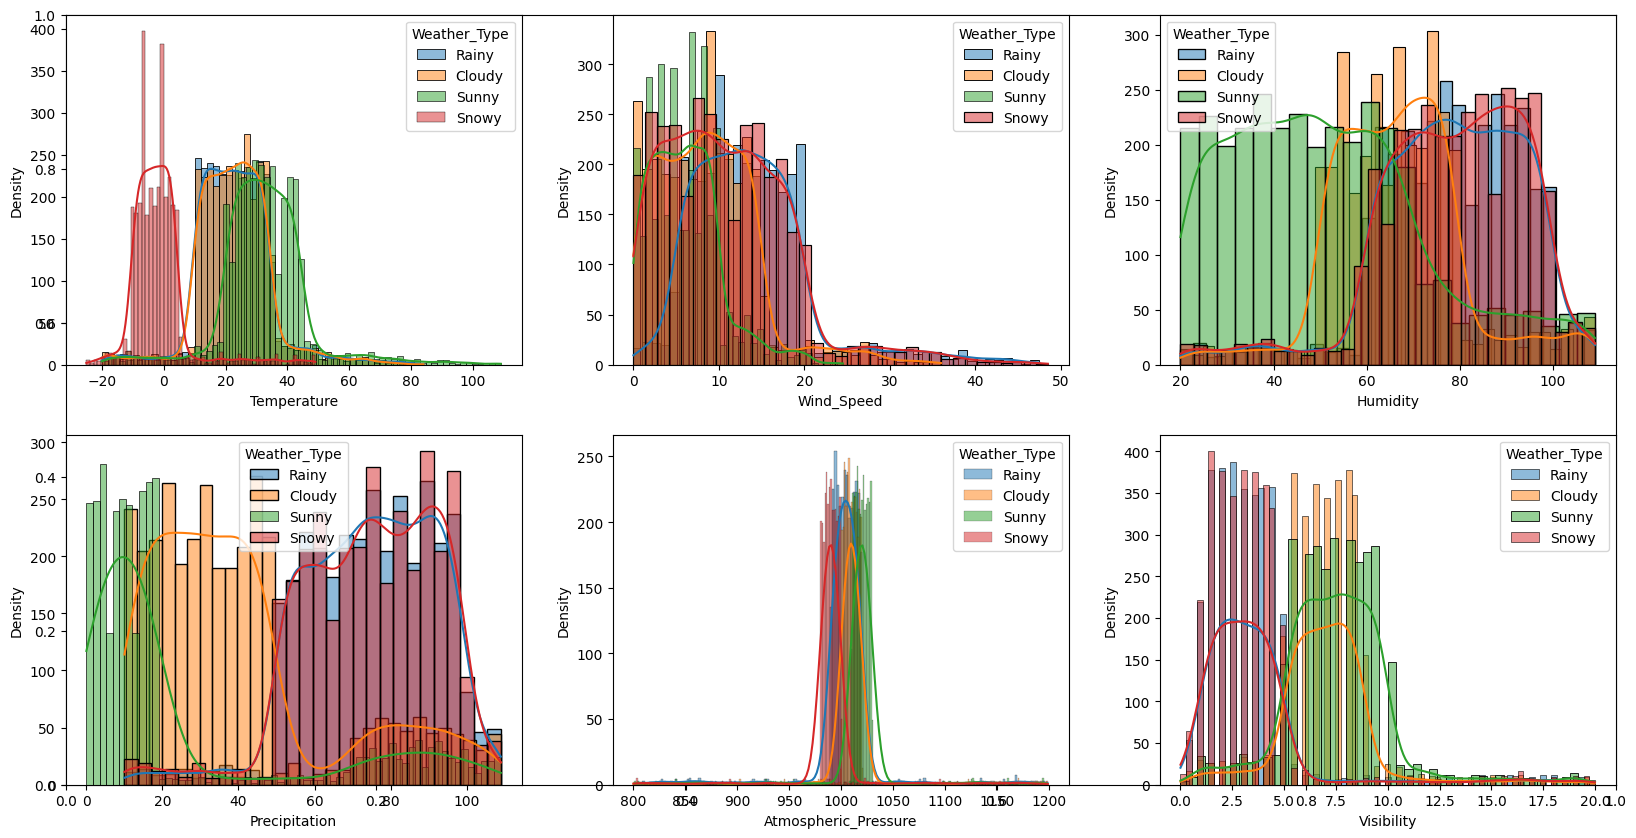

In [142]:
#checking the distribution of Temperature, Humidity,Wind_Speed,Precipitation,Atmospheric_Pressure,Visibility
#Distribution of continuous variables
def distributionByTargetClass(dataframe, colName, position, plt_color):  
    weather_data_vis = weather_data.filter(items=[colName, 'Weather_Type'])
    # Loop through each Weather Type and plot
    for weather in dataframe['Weather_Type'].unique():
        subset = weather_data_vis[weather_data_vis['Weather_Type'] == weather]
        sns.histplot(subset[colName], kde=True, label=weather)

x = 1 
fig, ax = plt.subplots(figsize=(20,10))
for colName in ['Temperature','Wind_Speed','Humidity', 'Precipitation', 
                'Atmospheric_Pressure', 'Visibility']:
    plt.subplot(2,3,x)
    distributionByTargetClass(weather_data, colName,1, 'blue')
    plt.xlabel(colName)
    plt.ylabel('Density') 
    plt.legend(title='Weather_Type')
    x +=1 


#### Distribution of categorical variables against target class.

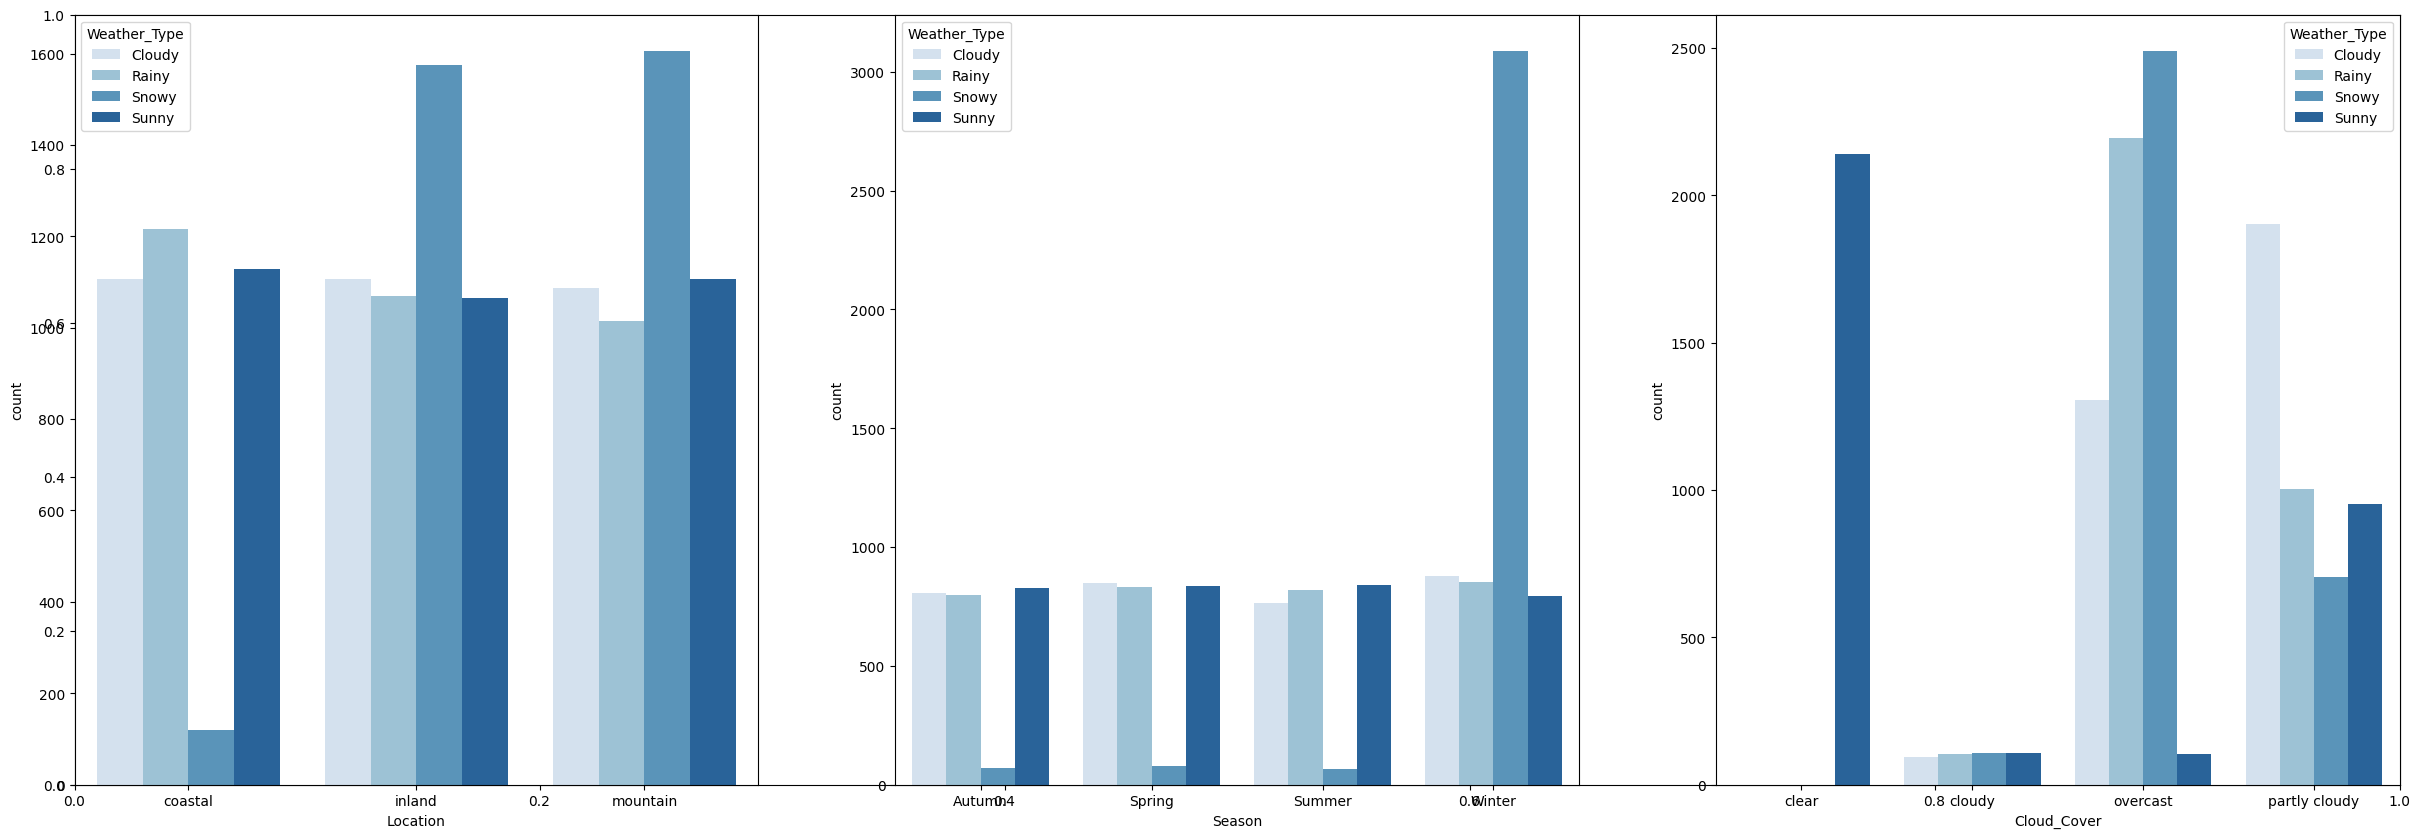

In [143]:
#Check the distribution of categorical variable against target class.
fig, ax = plt.subplots(figsize=(30,10))
x = 1
for colName in ['Location','Season','Cloud_Cover']:
    plt.subplot(1,3,x)
    weather_data_vis = weather_data.filter(items=[colName, 'Weather_Type'])
    sns.countplot(x=colName, hue='Weather_Type', data=weather_data_vis, palette="Blues")
    x +=1

#### Box Plots

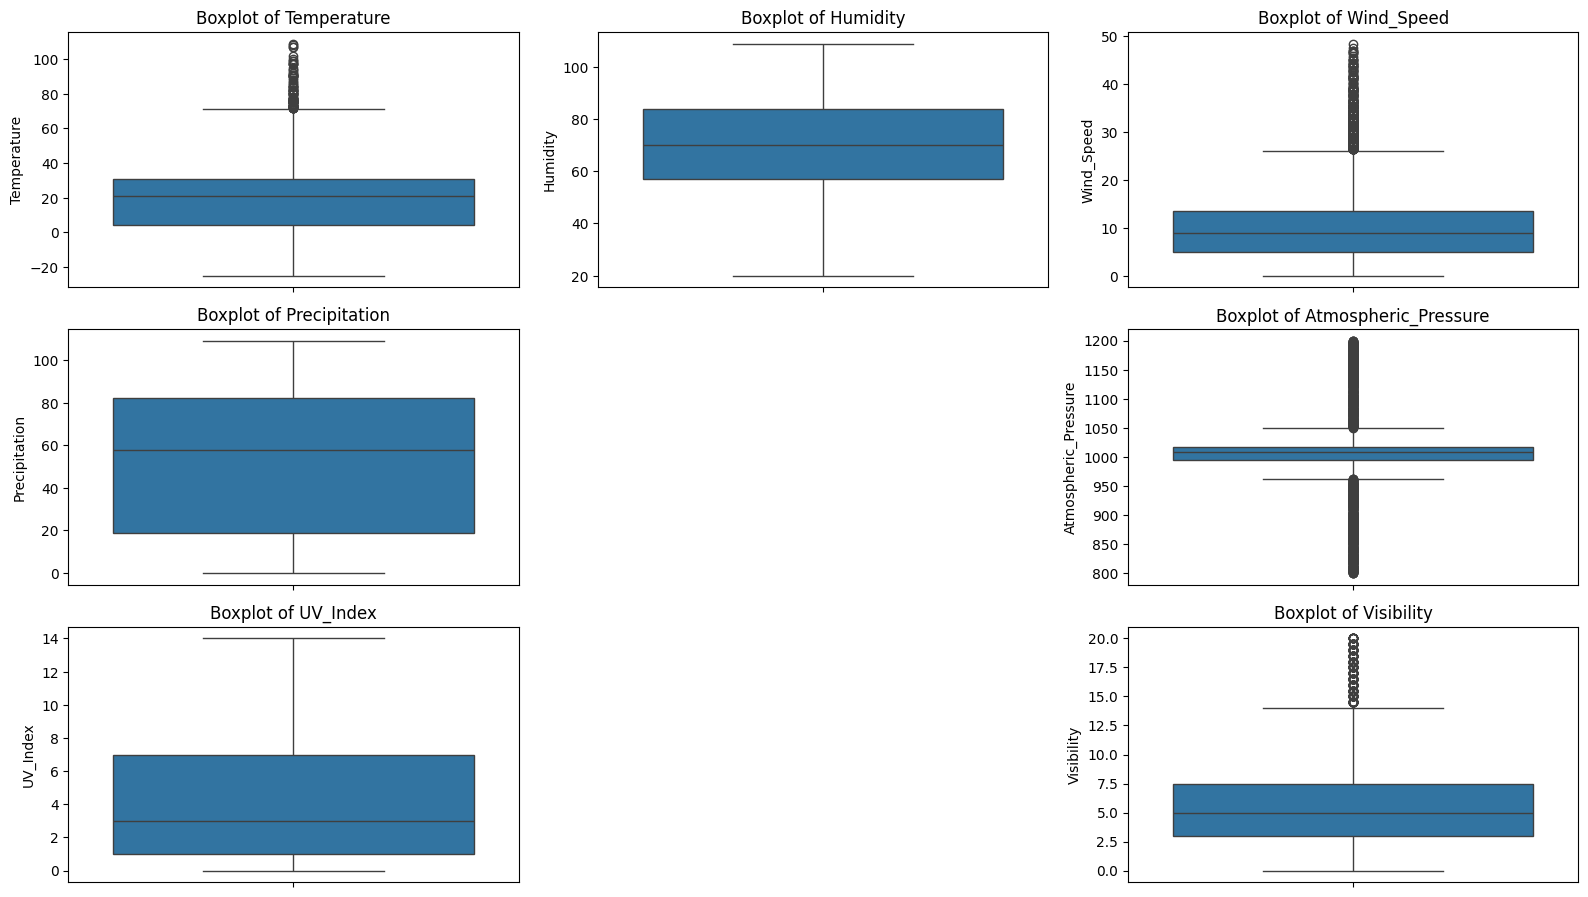

In [144]:
plt.figure(figsize = (16, 12))

# Iterate over all columns in the DataFrame and create boxplots
for i, col in enumerate(weather_data.columns, 1):

    if weather_data[col].dtype == 'category':
        continue
    plt.subplot(4, 3, i)  # Adjust the number of rows and columns as needed
    sns.boxplot(y=weather_data[col])
    plt.title(f'Boxplot of {col}')

plt.tight_layout()  # Adjust subplots to fit into the figure area
plt.show()

#### Overvations based on EDA. - Anit to update the contents


- It can be seen that the **Temperature**, **Wind Speed**, **Atmospheric Pressure**, **Visibility** has some outliers present in them.
    - **Temperature**: The temprature above 75 degrees doesnot seem to be in celcius. The temprature above 75 degrees can be converted to celcius.
    - **Wind Speed**: Wind speed upto 50km\hr is can be considered for rainy season if there is a strong rainfall.
    - **Atomospheric Pressure**: A relatively narrow range with a few potential outliers on both ends. The distribution is fairly centered.
    - **Visibility**: A wide range with potential outliers in the lower visibility range. The distribution is skewed towards higher visibility.
- **Range of Data**:
    Some variables have a very wide range (e.g., Temperature, Wind Speed, Visibility), while others have a narrower range (e.g., UV Index). This might require normalization or standardization for certain analyses.
  


In [145]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Encoding categorical variables like Cloud Cover, Season, and Location to numeric values.
labelencoder = LabelEncoder()  
for colName in ['Cloud_Cover', 'Season', 'Weather_Type' ]:
    weather_data[colName+'_encoded']   = labelencoder.fit_transform(weather_data[colName]) 
    if(colName == 'Weather_Type'):
        target_encoded_label_classes = labelencoder.classes_   

weather_data.drop(['Cloud_Cover', 'Season', 'Weather_Type'], axis=1, inplace=True)
#print(target_encoded_label_classes) 

In [146]:
weather_data.rename(columns={'Cloud_Cover_encoded': 'Cloud_Cover', 'Season_encoded': 'Season', 'Weather_Type_encoded': 'Weather_Type'}, inplace=True)
 

In [147]:
# Apply one-hot-encoding on Location data
weather_data_final = pd.get_dummies(weather_data, columns=['Location'], prefix=['Location']) 

In [148]:
weather_data_final.head(2)

,Temperature,Humidity,Wind_Speed,Precipitation,Atmospheric_Pressure,UV_Index,Visibility,Cloud_Cover,Season,Weather_Type,Location_coastal,Location_inland,Location_mountain
0,14,73,9.5,82,1010.82,2,3.5,3,3,1,False,True,False
1,39,96,8.5,71,1011.43,7,10.0,3,1,0,False,True,False


#### Correlation Analysis and visualization

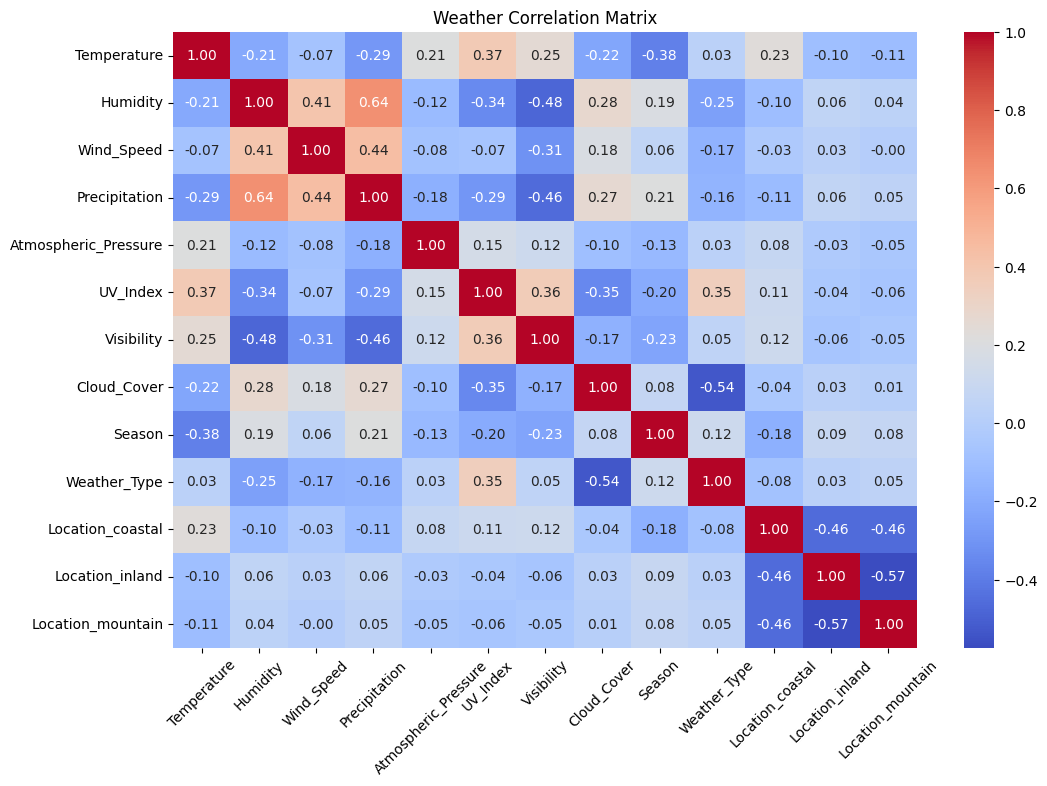

In [149]:
# Compute correlation matrix
corr_matrix = weather_data_final.corr()

# Plot heatmap using seaborn
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', xticklabels=corr_matrix.columns, yticklabels=corr_matrix.columns)

# Set plot title
plt.title('Weather Correlation Matrix')
plt.xticks(rotation=45)
plt.show()

## Anit to update the analysis

**Positive Correlations**:
- Humidity, Precipitation (%), Cloud Cover, and Weather Type have strong positive correlations. This indicates that higher humidity, precipitation, and Cloud cover are associated with certain weather types (likely rainy or snowy).

**Negative Correlations**:
- Temperature and Weather Type have a strong negative correlation, suggesting lower temperatures are associated with certain weather types (likely snowy).
- Visibility (km) and Weather Type have a strong negative correlation, suggesting lower visibility is associated with specific weather conditions.

Also precipitation and cloud cover seems to have same correlation with weather type about 64% so, we can consider one of them. Here we will consider
percipitation.


## 3. Feature Engineering - Data Pre-processing and cleaning 

#### Selecting on humidity, cloud cover, temperature and visibility, dropping other columns
##### 1. Perform data cleansing (Null, NAN treatement) - Completed
##### 2. Convert Categorical data - Completed
##### 3. Treate Imbalanced Data (Not Required)
##### 4. Rescale the Features - (Next)
##### 5. Separate dependent and independent variables for training and testing purpose (Completed)


## The below reference for scaling and outlier treatment
## MaxAbsScaler, StandardScaler and MinMaxScaler are very sensitive to the presence of outliers.
## RobustScaler, 
https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html


In [150]:
#Apply feature scaling on few columns
from sklearn.preprocessing import StandardScaler, RobustScaler
standardScaler = StandardScaler()
robustScaler = RobustScaler()

vars = [ 'Wind_Speed','Humidity', 'Precipitation', 'Atmospheric_Pressure', 'Visibility']
weather_data_final[vars] = standardScaler.fit_transform(weather_data_final[vars])

weather_data_final['Temperature'] = robustScaler.fit_transform(weather_data_final[['Temperature']])

In [151]:
#weather_data_final.drop(['UV_Index'],  axis=1, inplace=True)
weather_data_final.head(2)

,Temperature,Humidity,Wind_Speed,Precipitation,Atmospheric_Pressure,UV_Index,Visibility,Cloud_Cover,Season,Weather_Type,Location_coastal,Location_inland,Location_mountain
0,-0.259259,0.212404,-0.048086,0.887629,0.134203,2,-0.582231,3,3,1,False,True,False
1,0.666667,1.351385,-0.192836,0.543291,0.150602,7,1.345768,3,1,0,False,True,False


## Model Building 
#### 1. Logistic Regression

In [152]:
#Import common stats libraries
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import label_binarize
from sklearn import model_selection

from sklearn.model_selection import train_test_split

In [153]:
from sklearn.linear_model import LogisticRegression

In [154]:
## Split into training and test set
## This dataset will be used by evaluation of all the alorithums

X = weather_data_final.drop(['Weather_Type'],  axis=1)

#y is target variable
Y = weather_data_final.Weather_Type

#### Split the data into traning and test set. Train = 80% and Test = 20%

In [155]:
np.random.seed(0)
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size = 0.8, test_size = 0.2, random_state = 100, stratify = Y)

In [156]:
# Define a geeric function which takes model as input along with train and test data.
# It should emmit the accuracy, precision, recall, ROC-AUC, Classification Report as output

def fit_model_n_train(name, model, X_train, X_test, y_train, y_test):
    print('====================',name,'===============================')
        
    # fit the model
    model.fit(X_train, y_train)
    
    # Predict the value on test data and find score, accuracy-score
    y_predict = model.predict(X_test) 
    y_pred1 = model.predict_proba(X_test)

    model_train_score = model.score(X_train, y_train)
    # predict the accuracy score based on model
    model_accuracy_score = accuracy_score(y_test,y_predict)
    print("model score on training set =", model_train_score) 
    print("model_accuracy_score=", model_accuracy_score)
    
    # Compute the confusion matrix from the predictions and actuals
    confusion_metrics = confusion_matrix(y_test, y_predict, labels=[0,1,2,3])
    print("cf=", confusion_metrics)

    #Find Classification Report
    model_classification_report = classification_report(y_test, y_predict, target_names = target_encoded_label_classes)
    print()
    print(name, " Classification Report:")    
    print(model_classification_report)
    print('----------------------------------------------------------')

    
    model_precision_score = round(precision_score(y_test,y_predict, average='weighted', labels=[0,1,2,3]),3)
    model_recall_score = round(recall_score(y_test,y_predict, average='weighted', labels=[0,1,2,3]), 3)    
    model_f1_score= round(f1_score(y_test, y_predict, average='weighted', labels=[0,1,2,3]),3)    
        
    return model_train_score, model_accuracy_score, model_precision_score, \
    model_recall_score, model_f1_score

In [157]:
# Multinomial logistic regression
lg_regression = LogisticRegression(solver='lbfgs')
lr_train_score, lr_accuracy, lr_precision, lr_recall, lr_f1_score = \
        fit_model_n_train("Logistic Regression", lg_regression, X_train, X_test, y_train, y_test)
 

==================== Logistic Regression ===============================
model score on training set = 0.8569128787878788
model_accuracy_score= 0.8526515151515152
cf= [[544  64  18  34]
 [ 33 564  40  23]
 [ 18   7 611  24]
 [ 79  31  18 532]]

Logistic Regression  Classification Report:
              precision    recall  f1-score   support

      Cloudy       0.81      0.82      0.82       660
       Rainy       0.85      0.85      0.85       660
       Snowy       0.89      0.93      0.91       660
       Sunny       0.87      0.81      0.84       660

    accuracy                           0.85      2640
   macro avg       0.85      0.85      0.85      2640
weighted avg       0.85      0.85      0.85      2640

----------------------------------------------------------


In [158]:
#### 2. Decision Tree

In [159]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Initialize the model
dt_model = DecisionTreeClassifier(max_depth=3)

# Train the model
dt_model.fit(X_train, y_train)

# Predict on the test set
y_pred = dt_model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Classification report
print('Classification Report:')
print(classification_report(y_test, y_pred,target_names = target_encoded_label_classes))

# Confusion matrix
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))



Accuracy: 0.86
Classification Report:
              precision    recall  f1-score   support

      Cloudy       0.77      0.84      0.80       955
       Rainy       0.84      0.84      0.84       982
       Snowy       0.98      0.92      0.95      1033
       Sunny       0.85      0.84      0.85       990

    accuracy                           0.86      3960
   macro avg       0.86      0.86      0.86      3960
weighted avg       0.86      0.86      0.86      3960

Confusion Matrix:
[[801  68   6  80]
 [123 824   3  32]
 [ 38  15 951  29]
 [ 75  77   8 830]]


### Visualize the Decision Tree

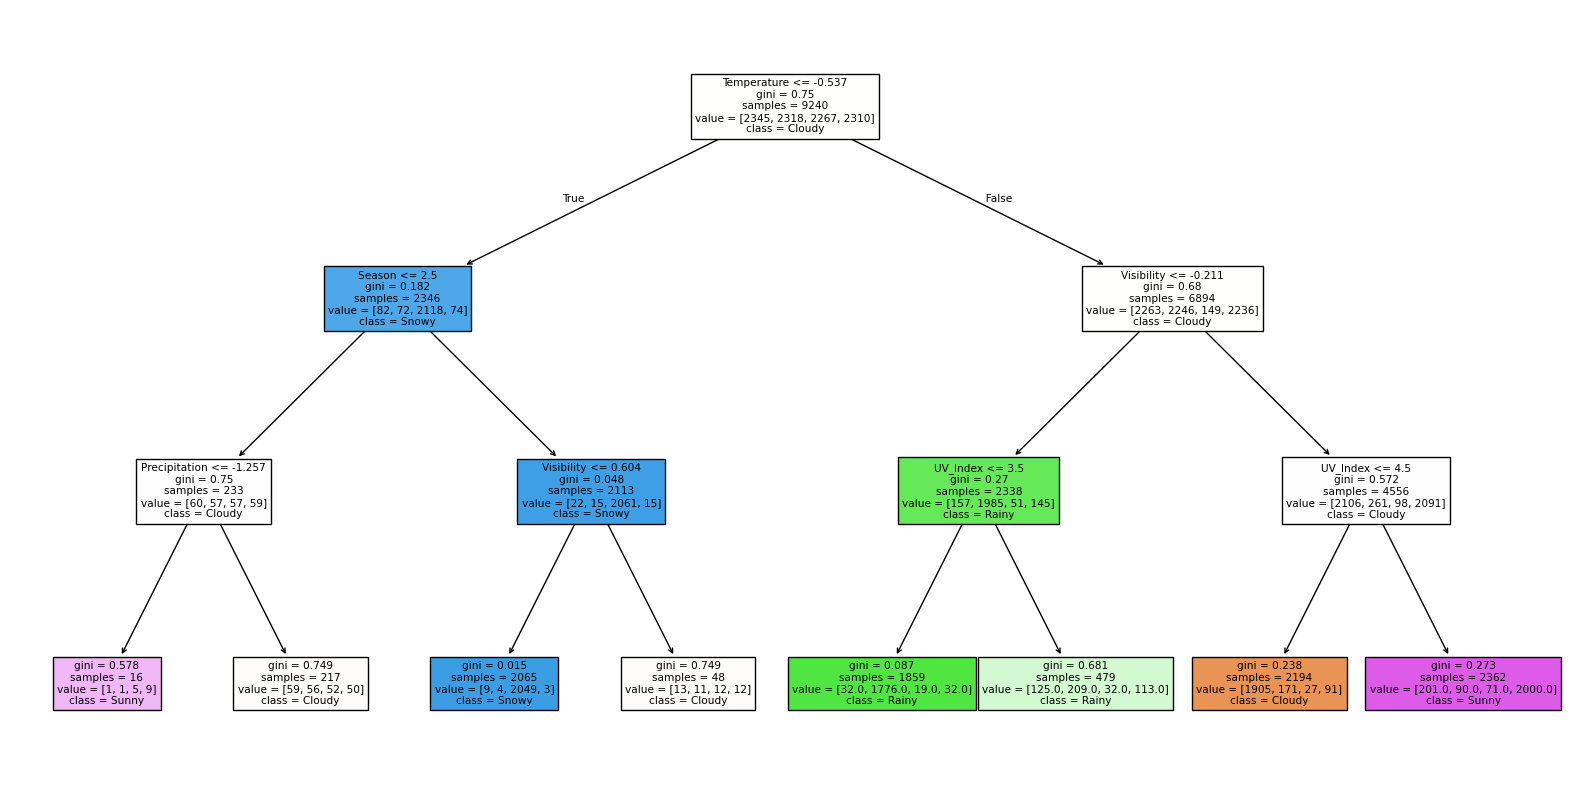

In [160]:
plt.figure(figsize=(20,10))
plot_tree(dt_model, feature_names=X.columns, class_names=target_encoded_label_classes, filled=True)
plt.show()